# House Price Prediction Using Linear Regression


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('csvs/HousePrice.csv')
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [3]:
print("\n\ninfo :\n",df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


info :
 None


In [4]:
df['rooms'] = df['bedrooms'] + df['bathrooms']

In [5]:
df.drop(df[['stories','mainroad','guestroom',	'basement',	'hotwaterheating',	'airconditioning',	'parking',	'prefarea',	'furnishingstatus','bedrooms','bathrooms']],axis=1,inplace=True)

In [6]:

df['PricePerRoom'] = df['price'] / df['rooms']
print(df[['price', 'rooms', 'PricePerRoom']].head())

      price  rooms  PricePerRoom
0  13300000      6  2.216667e+06
1  12250000      8  1.531250e+06
2  12250000      5  2.450000e+06
3  12215000      6  2.035833e+06
4  11410000      5  2.282000e+06


In [7]:
df.to_csv('csvs/HousePrice1.csv',index = False)

## Splitting data

In [8]:
x = df.drop(['price'], axis =1)
y = df['price']

## DataPreProcessing

In [9]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


## Plotting

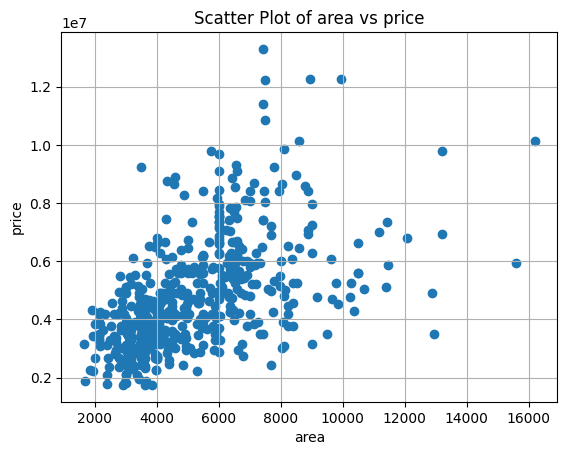

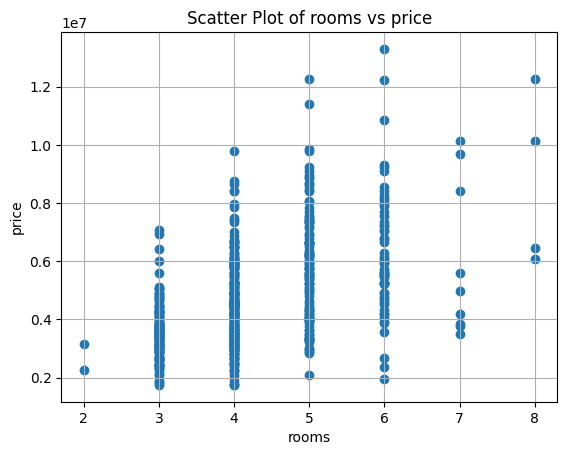

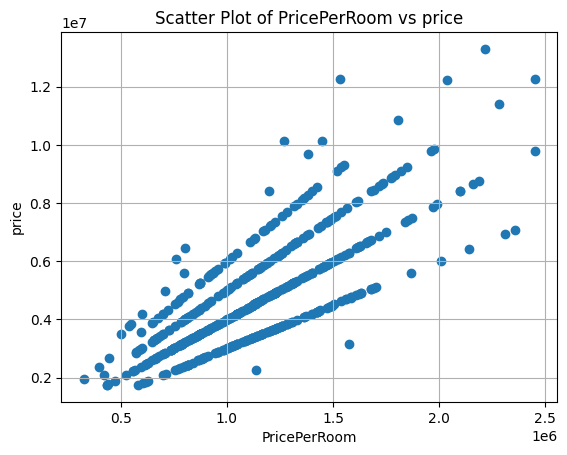

In [10]:
for column in df.columns:
    if column != 'price':
        plt.figure()
        plt.scatter(df[column],df['price'])
        plt.title(f'Scatter Plot of {column} vs price')
        plt.xlabel(column)
        plt.ylabel('price')
        plt.grid(True)
        plt.show()
    

**From This Scatter Plot we can say that the values are linearnly increasing hence use Linear Regression**

## Splitting Train, Test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Fitting Model

In [12]:

model = LinearRegression()
model.fit(x_train, y_train)

# Evaluate Model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: ${mse:.2f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: $162263555772.29
R-squared: 0.9679


## User Input

In [ ]:
df.head()

,price,area,rooms,PricePerRoom
0,13300000,7420,6,2.216667e+06
1,12250000,8960,8,1.531250e+06
2,12250000,9960,5,2.450000e+06
3,12215000,7500,6,2.035833e+06
4,11410000,7420,5,2.282000e+06


In [ ]:
area = int(input("Enter Area of House: "))
rooms = int(input("Enter no. of rooms in  house icluding bathrooms: "))
PricePerRoom = area / rooms
user_data = pd.DataFrame([[area,rooms,PricePerRoom]],columns = ['area','rooms','PricePerRoom'])
user_data = scaler.transform(user_data)
print(user_data)


predict_price = model.predict(user_data)
print("\nPrice of house is:",predict_price)

[[ 1.04672629  1.68841638 -3.13399117]]

Price of house is: [1851656.06125945]
